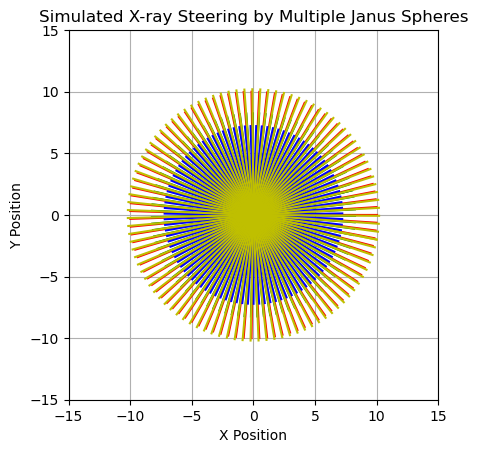

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def rotate_point_about_origin(point, angle):
    """ Rotate a point counterclockwise by a given angle around the origin. """
    ox, oy = 0, 0  # Origin
    px, py = point

    qx = ox + np.cos(angle) * (px - ox) - np.sin(angle) * (py - oy)
    qy = oy + np.sin(angle) * (px - ox) + np.cos(angle) * (py - oy)
    return qx, qy

def simulate_steering():
    """ Simulate the steering of X-rays by multiple Janus spheres. """
    angles = np.linspace(0, 2*np.pi, 100)  # Range of angles
    xray_paths = [(10, 0), (8, 2), (6, 4), (10, -2)]  # Initial paths of different X-rays

    fig, ax = plt.subplots()
    colors = ['r', 'g', 'b', 'y']  # Different colors for different paths

    for idx, xray_path in enumerate(xray_paths):
        for angle in angles:
            steered_xray = rotate_point_about_origin(xray_path, angle)
            ax.plot([0, steered_xray[0]], [0, steered_xray[1]], colors[idx]+'-')

    ax.set_aspect('equal', 'box')
    ax.set_xlim(-15, 15)
    ax.set_ylim(-15, 15)
    plt.title('Simulated X-ray Steering by Multiple Janus Spheres')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.grid(True)
    plt.show()

if __name__ == '__main__':
    simulate_steering()


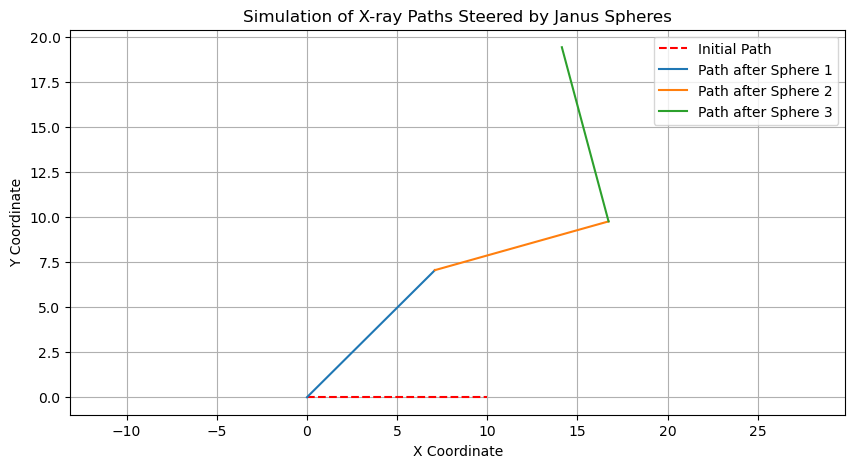

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def rotate_vector(vector, angle_deg):
    """Rotate a vector by a given angle in degrees."""
    angle_rad = np.radians(angle_deg)
    rotation_matrix = np.array([
        [np.cos(angle_rad), -np.sin(angle_rad)],
        [np.sin(angle_rad), np.cos(angle_rad)]
    ])
    return rotation_matrix.dot(vector)

def feedback_control(desired_direction, current_direction):
    """Adjust the current direction based on feedback to match the desired direction."""
    error = np.arctan2(desired_direction[1], desired_direction[0]) - np.arctan2(current_direction[1], current_direction[0])
    adjustment = np.degrees(error) / 10  # Proportional control
    return adjustment

def plot_xray_paths(initial_direction, sphere_angles, impact_point=(0, 0), length=10, fine_tune=False):
    """
    Plot the path of an x-ray as it hits multiple Janus spheres, each with a different rotation angle.
    Optionally fine-tune the angles for more precise control.
    """
    plt.figure(figsize=(10, 5))
    current_position = np.array(impact_point)
    current_direction = np.array(initial_direction)
    
    # Plot initial x-ray path
    initial_path_end = current_position + length * current_direction
    plt.plot([current_position[0], initial_path_end[0]], [current_position[1], initial_path_end[1]], 'r--', label='Initial Path')

    for i, angle in enumerate(sphere_angles):
        # Fine-tuning angles if enabled
        if fine_tune:
            angle += np.random.uniform(-1, 1)  # Random fine-tuning within +-1 degree

        # Calculate new direction after hitting the sphere
        new_direction = rotate_vector(current_direction, angle)
        new_position = current_position + length * new_direction
        
        # Plot the new path
        plt.plot([current_position[0], new_position[0]], [current_position[1], new_position[1]], label=f'Path after Sphere {i+1}')
        
        # Update current position and direction for the next sphere
        current_position = new_position
        current_direction = new_direction
    
    plt.axis('equal')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Simulation of X-ray Paths Steered by Janus Spheres')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
initial_direction = [1, 0]  # X-ray initially moving in the positive x-direction
sphere_angles = [45, -30, 90]  # Rotation angles of each Janus sphere in degrees
plot_xray_paths(initial_direction, sphere_angles, fine_tune=True)


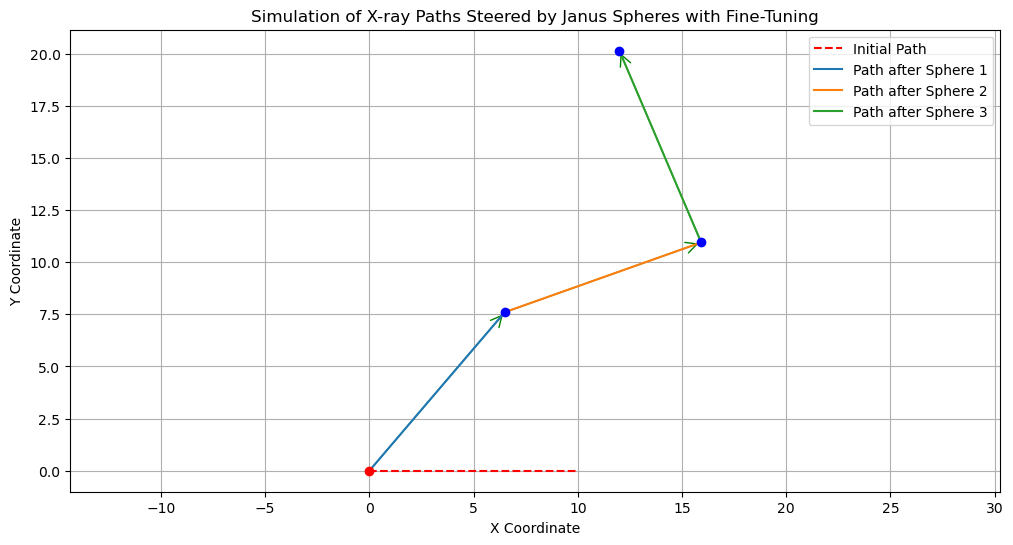

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def rotate_vector(vector, angle_deg):
    """Rotate a vector by a given angle in degrees."""
    angle_rad = np.radians(angle_deg)
    rotation_matrix = np.array([
        [np.cos(angle_rad), -np.sin(angle_rad)],
        [np.sin(angle_rad), np.cos(angle_rad)]
    ])
    return rotation_matrix.dot(vector)

def feedback_control(desired_direction, current_direction):
    """Adjust the current direction based on feedback to match the desired direction."""
    error = np.arctan2(desired_direction[1], desired_direction[0]) - np.arctan2(current_direction[1], current_direction[0])
    adjustment = np.degrees(error) / 10  # Proportional control
    return adjustment

def plot_xray_paths(initial_direction, sphere_angles, impact_point=(0, 0), length=10, fine_tune=False):
    plt.figure(figsize=(12, 6))
    current_position = np.array(impact_point)
    current_direction = np.array(initial_direction)
    
    # Define an initial desired direction, possibly based on some target or algorithmic path calculation
    desired_direction = np.array([1, 1])  # Example: aiming diagonally initially

    initial_path_end = current_position + length * current_direction
    plt.plot([current_position[0], initial_path_end[0]], [current_position[1], initial_path_end[1]], 'r--', label='Initial Path')
    plt.scatter(*current_position, color='red', zorder=5)  # Mark the initial impact point

    for i, angle in enumerate(sphere_angles):
        if fine_tune:
            adjustment = feedback_control(desired_direction, current_direction)
            angle += adjustment  # Apply feedback control adjustment

        new_direction = rotate_vector(current_direction, angle)
        new_position = current_position + length * new_direction
        plt.plot([current_position[0], new_position[0]], [current_position[1], new_position[1]], label=f'Path after Sphere {i+1}')
        plt.scatter(*new_position, color='blue', zorder=5)  # Mark impact points
        # Add arrows to show direction change
        arrow = patches.FancyArrowPatch(posA=current_position, posB=new_position, color="green", arrowstyle='->', mutation_scale=20)
        plt.gca().add_patch(arrow)

        current_position = new_position
        current_direction = new_direction
        # Update desired direction dynamically if needed
        desired_direction = rotate_vector(desired_direction, 5)  # Example: Rotate desired direction slightly
    
    plt.axis('equal')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Simulation of X-ray Paths Steered by Janus Spheres with Fine-Tuning')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
initial_direction = [1, 0]  # X-ray initially moving in the positive x-direction
sphere_angles = [45, -30, 90]  # Rotation angles of each Janus sphere in degrees
plot_xray_paths(initial_direction, sphere_angles, fine_tune=True)


In [11]:
import numpy as np

# Sample empirical data: angle (degrees) vs. reflection efficiency (percentage)
empirical_data = {
    'material1': {10: 0.9, 11: 0.95, 12: 0.85, 13: 0.75},  # Example values
}

def compound_reflection_efficiency(material, angles):
    """Calculate compounded reflection efficiency for a series of reflections at specified angles."""
    efficiency = 1.0  # Start with 100% of the initial x-ray intensity
    for angle in angles:
        if angle in empirical_data[material]:
            efficiency *= empirical_data[material][angle]
        else:
            # Interpolate or approximate if angle not directly measured
            closest_angles = sorted(empirical_data[material].keys())
            closest_angle = min(closest_angles, key=lambda x: abs(x - angle))
            efficiency *= empirical_data[material][closest_angle]
    
    return efficiency

# Example usage
material = 'material1'
reflection_angles = [10, 11, 12, 13]  # sequence of angles at which reflections occur
total_efficiency = compound_reflection_efficiency(material, reflection_angles)
print(f"Total compounded reflection efficiency: {total_efficiency * 100:.2f}%")


Total compounded reflection efficiency: 54.51%


In [16]:
import numpy as np

# Parameters
foxel_size = 0.1  # in cm
grid_dimensions = (100, 100, 100)  # example grid size
attenuation_map = np.zeros(grid_dimensions)  # Initialize a grid to store attenuation data

def trace_ray_through_foxels(start_point, direction, energy):
    position = np.array(start_point, dtype=float)  # Initialize as float to accommodate fractional increments
    direction = np.array(direction, dtype=float)  # Ensure direction is a NumPy array for element-wise operations

    while inside_grid(position, grid_dimensions):
        foxel_indices = (position / foxel_size).astype(int)  # Convert position to indices
        attenuation_map[tuple(foxel_indices)] += calculate_attenuation(energy, foxel_size)
        position += direction * foxel_size  # Correctly perform element-wise multiplication

def inside_grid(position, dimensions):
    # Make sure to compare integer indices, not floating point positions
    indices = (position / foxel_size).astype(int)
    return all(0 <= idx < dim for idx, dim in zip(indices, dimensions))

def calculate_attenuation(energy, distance):
    # Simplified attenuation calculation
    return np.exp(-energy * distance)

# Example ray tracing
trace_ray_through_foxels((5, 5, 0), (0, 0, 1), 1.0)  # Trace one ray through the grid
